In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.features import Rank2D
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
np.random.seed(0)

#Load dataset
dataset = pd.read_csv('crash.csv', header=0, index_col=0)


#Create DataFrame
df = pd.DataFrame(dataset) 


#new 'sex' column using floats instead of strings: 0 is female; 1 is male
df['sex'] = pd.factorize(df['sex'])[0]
df['dead'] = np.where(df['dead']=='alive', 1, 0)
#df['airbag'] = np.where(df['dead']=='alive', 1, 0)


#Show top rows
df.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
1,25-39,25.069,1,none,belted,1,0,26,1997,1990.0,unavail,driver,0,3.0,2:3:1
2,10-24,25.069,1,airbag,belted,1,0,72,1997,1995.0,deploy,driver,1,1.0,2:3:2
3,10-24,32.379,1,none,none,1,0,69,1997,1988.0,unavail,driver,0,4.0,2:5:1
4,25-39,495.444,1,airbag,belted,1,0,53,1997,1995.0,deploy,driver,1,1.0,2:10:1
5,25-39,25.069,1,none,belted,1,0,32,1997,1988.0,unavail,driver,0,3.0,2:11:1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26217 entries, 1 to 26217
Data columns (total 15 columns):
dvcat          26217 non-null object
weight         26217 non-null float64
dead           26217 non-null int32
airbag         26217 non-null object
seatbelt       26217 non-null object
frontal        26217 non-null int64
sex            26217 non-null int32
ageOFocc       26217 non-null int64
yearacc        26217 non-null int64
yearVeh        26216 non-null float64
abcat          26217 non-null object
occRole        26217 non-null object
deploy         26217 non-null int64
injSeverity    26064 non-null float64
caseid         26217 non-null object
dtypes: float64(3), int32(2), int64(4), object(6)
memory usage: 2.4+ MB


In [4]:
print(df.describe())

             weight          dead       frontal           sex      ageOFocc  \
count  26217.000000  26217.000000  26217.000000  26217.000000  26217.000000   
mean     462.811611      0.954991      0.643323      0.532822     37.206202   
std     1524.844430      0.207328      0.479027      0.498931     17.909317   
min        0.000000      0.000000      0.000000      0.000000     16.000000   
25%       32.467000      1.000000      0.000000      0.000000     22.000000   
50%       86.986000      1.000000      1.000000      1.000000     33.000000   
75%      364.717000      1.000000      1.000000      1.000000     48.000000   
max    57871.595000      1.000000      1.000000      1.000000     97.000000   

            yearacc       yearVeh        deploy   injSeverity  
count  26217.000000  26216.000000  26217.000000  26064.000000  
mean    1999.555556   1992.804699      0.337033      1.715508  
std        1.702546      5.594990      0.472705      1.293357  
min     1997.000000   1953.00000

#### yearVeh and Injury severity observe missing values.

In [5]:
df.fillna(df.median(),inplace=True)
print(df.describe())

             weight          dead       frontal           sex      ageOFocc  \
count  26217.000000  26217.000000  26217.000000  26217.000000  26217.000000   
mean     462.811611      0.954991      0.643323      0.532822     37.206202   
std     1524.844430      0.207328      0.479027      0.498931     17.909317   
min        0.000000      0.000000      0.000000      0.000000     16.000000   
25%       32.467000      1.000000      0.000000      0.000000     22.000000   
50%       86.986000      1.000000      1.000000      1.000000     33.000000   
75%      364.717000      1.000000      1.000000      1.000000     48.000000   
max    57871.595000      1.000000      1.000000      1.000000     97.000000   

            yearacc       yearVeh        deploy   injSeverity  
count  26217.000000  26217.000000  26217.000000  26217.000000  
mean    1999.555556   1992.804745      0.337033      1.717168  
std        1.702546      5.594888      0.472705      1.289760  
min     1997.000000   1953.00000

In [6]:
df.corr()

,weight,dead,frontal,sex,ageOFocc,yearacc,yearVeh,deploy,injSeverity
weight,1.000000,0.057978,-0.009400,-0.012894,-0.030488,0.009643,-0.011240,-0.061727,-0.202912
dead,0.057978,1.000000,0.068028,-0.032181,-0.089814,0.018755,0.052437,0.011559,-0.369565
frontal,-0.009400,0.068028,1.000000,0.061673,-0.044253,0.014686,-0.028890,0.230715,-0.022767
sex,-0.012894,-0.032181,0.061673,1.000000,-0.048607,-0.003348,-0.094908,-0.035423,-0.041797
ageOFocc,-0.030488,-0.089814,-0.044253,-0.048607,1.000000,-0.006932,0.016446,0.008052,0.090817
yearacc,0.009643,0.018755,0.014686,-0.003348,-0.006932,1.000000,0.296381,0.120818,-0.041561
yearVeh,-0.011240,0.052437,-0.028890,-0.094908,0.016446,0.296381,1.000000,0.481915,-0.076658
deploy,-0.061727,0.011559,0.230715,-0.035423,0.008052,0.120818,0.481915,1.000000,0.063197
injSeverity,-0.202912,-0.369565,-0.022767,-0.041797,0.090817,-0.041561,-0.076658,0.063197,1.000000


#### Let's visualize to understand the dataset.

Text(0, 0.5, 'Frequency')

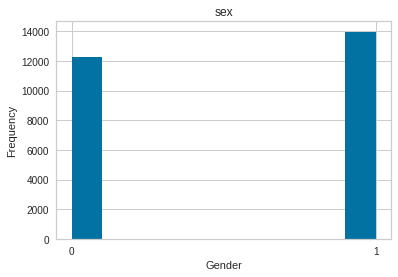

In [7]:
df.hist(column='sex')
plt.xticks(range(0, 2))
plt.xlabel("Gender")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

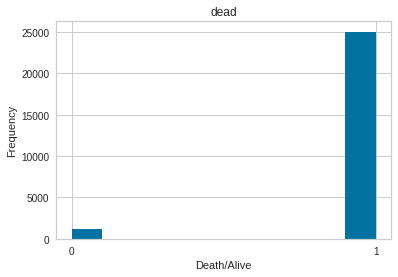

In [8]:
df.hist(column='dead')
plt.xticks(range(0, 2))
plt.xlabel("Death/Alive")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

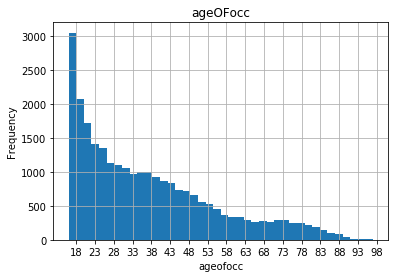

In [31]:
df.hist(column='ageOFocc',bins=40)
plt.xticks(range(18, 100,5))
plt.xlabel("ageofocc")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

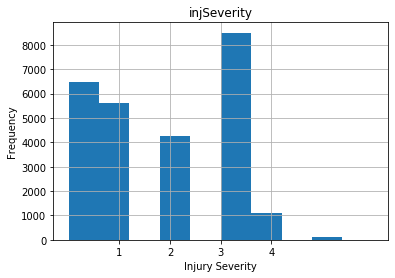

In [36]:
df.hist(column='injSeverity')
plt.xticks(range(1,5))
plt.xlabel("Injury Severity")
plt.ylabel("Frequency")

In [51]:
Dead_airbag_crt=pd.crosstab(df["dead"],df["airbag"]).apply(lambda r: r/r.sum(), axis=1)
Dead_airbag_crt

airbag,airbag,none
dead,,
0,0.433051,0.566949
1,0.555498,0.444502


In [46]:
Dead_seatbelt=df.groupby(["dead","seatbelt"]).size().to_frame('Count')
Dead_seatbelt['Percentage%']=Dead_seatbelt['Count']/Dead_seatbelt['Count'].sum()*100
Dead_seatbelt.sort_values(by='Count', ascending=False)

Count  Percentage%
dead seatbelt                    
1    belted    18073    68.936186
     none       6964    26.562917
0    none        680     2.593737
     belted      500     1.907159

In [52]:
Dead_seatbelt_crt=pd.crosstab(df["dead"],df["seatbelt"]).apply(lambda r: r/r.sum(), axis=1)
Dead_seatbelt_crt

seatbelt,belted,none
dead,,
0,0.423729,0.576271
1,0.721852,0.278148


In [54]:
Dead_abcat_crt=pd.crosstab(df["dead"],df["abcat"]).apply(lambda r: r/r.sum(), axis=1)
Dead_abcat_crt

abcat,deploy,nodeploy,unavail
dead,,,
0,0.311864,0.121186,0.566949
1,0.338219,0.217278,0.444502


In [55]:
Dead_occRole=pd.crosstab(df["dead"],df["occRole"]).apply(lambda r: r/r.sum(), axis=1)
Dead_occRole

occRole,driver,pass
dead,,
0,0.755085,0.244915
1,0.787235,0.212765


In [75]:
df_dummies = pd.get_dummies(df,columns=['dvcat','airbag','seatbelt','abcat','occRole'])
df_dummies.drop(['caseid'],axis=1,inplace=True)
df_dummies.head()

,weight,dead,frontal,sex,ageOFocc,yearacc,yearVeh,deploy,injSeverity,dvcat_1-9km/h,...,dvcat_55+,airbag_airbag,airbag_none,seatbelt_belted,seatbelt_none,abcat_deploy,abcat_nodeploy,abcat_unavail,occRole_driver,occRole_pass
1,25.069,1,1,0,26,1997,1990.0,0,3.0,0,...,0,0,1,1,0,0,0,1,1,0
2,25.069,1,1,0,72,1997,1995.0,1,1.0,0,...,0,1,0,1,0,1,0,0,1,0
3,32.379,1,1,0,69,1997,1988.0,0,4.0,0,...,0,0,1,0,1,0,0,1,1,0
4,495.444,1,1,0,53,1997,1995.0,1,1.0,0,...,0,1,0,1,0,1,0,0,1,0
5,25.069,1,1,0,32,1997,1988.0,0,3.0,0,...,0,0,1,1,0,0,0,1,1,0


In [76]:
df_dummies=df_dummies.astype('int64', copy=False)

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26217 entries, 1 to 26217
Data columns (total 23 columns):
weight             26217 non-null int64
dead               26217 non-null int64
frontal            26217 non-null int64
sex                26217 non-null int64
ageOFocc           26217 non-null int64
yearacc            26217 non-null int64
yearVeh            26217 non-null int64
deploy             26217 non-null int64
injSeverity        26217 non-null int64
dvcat_1-9km/h      26217 non-null int64
dvcat_10-24        26217 non-null int64
dvcat_25-39        26217 non-null int64
dvcat_40-54        26217 non-null int64
dvcat_55+          26217 non-null int64
airbag_airbag      26217 non-null int64
airbag_none        26217 non-null int64
seatbelt_belted    26217 non-null int64
seatbelt_none      26217 non-null int64
abcat_deploy       26217 non-null int64
abcat_nodeploy     26217 non-null int64
abcat_unavail      26217 non-null int64
occRole_driver     26217 non-null int64
occRole_pas

In [77]:
y=df_dummies['dead']
X=df_dummies.drop(['dead'],axis=1)

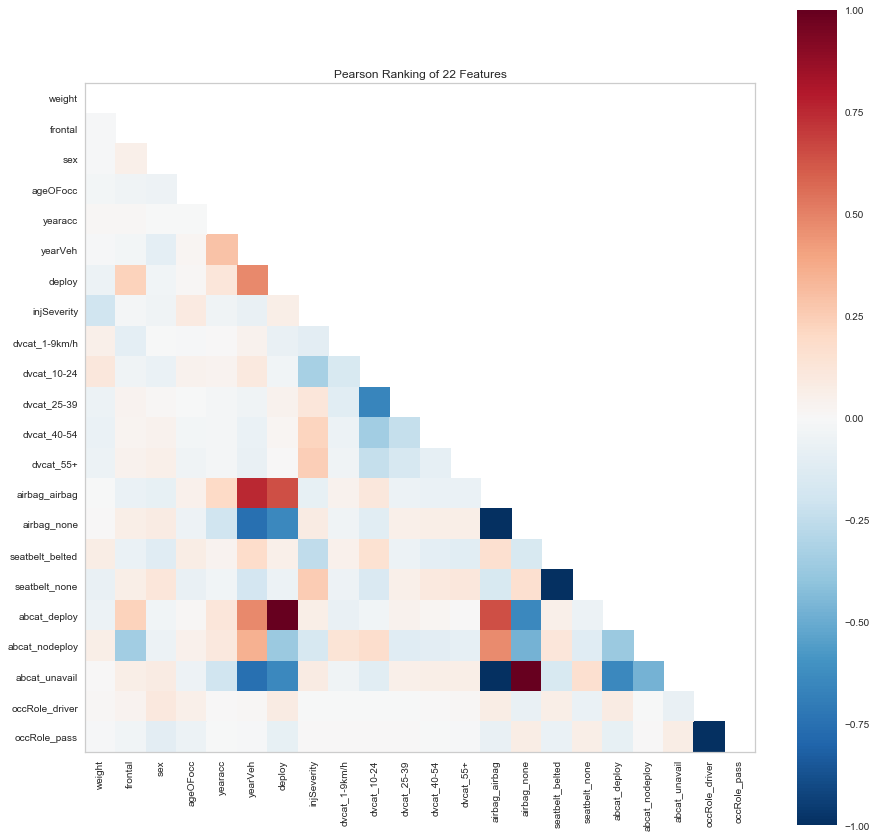

In [78]:
visualizer = Rank2D(algorithm='pearson', size=(1080, 1080))

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.poof()

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (18351, 22)
X_test Shape: (7866, 22)
y_train Shape: (18351,)
y_test Shape: (7866,)


In [84]:
classifier = LogisticRegression(random_state=0,solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 282   67]
 [  40 7477]]


In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       349
           1       0.99      0.99      0.99      7517

    accuracy                           0.99      7866
   macro avg       0.93      0.90      0.92      7866
weighted avg       0.99      0.99      0.99      7866



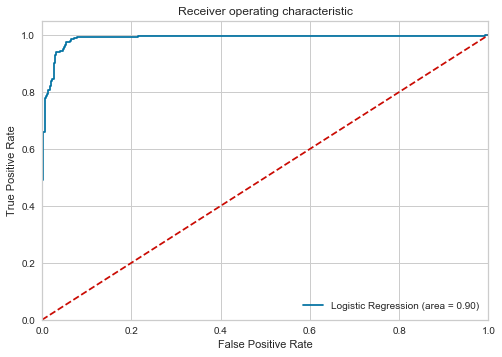

In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()